In [5]:
import sys

import math
import numpy as np
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plot
import scipy.fftpack
from scipy.signal import butter,filtfilt,sosfilt

# Helper functions to draw fft

In [76]:
#some util for fft
def draw_fft(signal,title="just FFT"):
    len_signal = len(signal)
    yfft = scipy.fft.fft(signal,norm="forward")
    print(yfft.size)
    xf = np.linspace(0.0, 1.0/(2.0*(1.0/len_signal)), len_signal//2)
    #plot.plot(xf,2.0/len(signal) * np.abs(yfft[:len(signal)//2]))
    plot.plot(xf,2.0/len_signal * np.abs(yfft[:len_signal//2]))
    plot.title(title)
    plot.show()
    
#some util for fft
def draw_fft(signal,title="just FFT",bw=None):
    len_signal = len(signal)
    yfft = scipy.fft.fft(signal,norm="forward")
    print(yfft.size)
    xf = np.linspace(0.0, 1.0/(2.0*(1.0/len_signal)), len_signal//2)
    #plot.plot(xf,2.0/len(signal) * np.abs(yfft[:len(signal)//2]))
    plot.plot(xf,2.0/len_signal * np.abs(yfft[:len_signal//2]))
    plot.title(title)
    plot.show()

def draw_fft2(signal,title="just FFT2"):
    len_signal = len(signal)
    yfft = scipy.fft.fft(signal)
    xf = np.linspace(0.0, 1.0/((1.0/len_signal)), len_signal)
    #plot.plot(xf,2.0/len(signal) * np.abs(yfft[:len(signal)//2]))
    plot.plot(xf,1.0/len_signal * np.abs(yfft[:len_signal]))
    plot.title(title)
    plot.show()
def iq_abs(c):
    return (math.sqrt((c.real ** 2 + c.imag ** 2)))

def draw_fft3(signal,title="just FFT3"):
    len_signal = len(signal)
    
    #get fft
    spect = np.fft.fft(signal,n=len_signal)
    #spect = spect[0:int((len(spect) / 2))]
    spect = spect[0:int((len(spect)))]
    
    #normalize
    spect_n = [(1.0 / (len_signal * len(spect))) * iq_abs(x) ** 2 for x in spect]
    spect_n = (10 * np.log10(spect_n)).tolist()

    
    #plot results
    len_spec_n = len(spect_n)
    xf = np.linspace(0.0, 1.0/(1.0*(1.0/len_spec_n)), len_spec_n)
    print(len(xf))
    plot.plot(xf,spect_n)
    plot.title(title)
    plot.show()

def draw_fft4(signal, title="just FFT4"):
    len_signal = len(signal)
    
    #get fft
    spect = np.fft.fft(signal,n=len_signal)
    #spect = spect[0:int((len(spect) / 2))]
    #spect = spect[0:int((len(spect)))]
    
    n = signal.size
    timestamp=1.0
    freq = np.fft.fftfreq(n,d=1.0/660000)
    
    
    #normalize
    spect_n = [(1.0 / (len_signal * len(spect))) * iq_abs(x) ** 2 for x in spect]
    spect_n = (10 * np.log10(spect_n)).tolist()

    
    #plot results
    #len_spec_n = len(spect_n)
    #xf = np.linspace(0.0, 1.0/(1.0*(1.0/len_spec_n)), len_spec_n)
    #print(len(xf))
    plot.plot(freq,spect_n)
    plot.title(title)
    plot.show()

    
def draw_fft5(signal,title="FFT 5",fc=None, bw=None, sr=None):
    len_signal = len(signal)
    yfft = scipy.fft.fft(signal,norm="forward")
    print(yfft.size)
    xf = np.linspace(fc-bw/2, fc+bw/2, sr)
    #plot.plot(xf,2.0/len(signal) * np.abs(yfft[:len(signal)//2]))
    plot.plot(xf,np.abs(yfft[:len_signal]))
    plot.title(title)
    plot.show()

def draw_peaks(signal,title="FFT 5",fc=None, bw=None, sr=None):
    len_signal = len(signal)
    yfft = scipy.fft.fft(signal,norm="forward")
    print(yfft.size)
    xf = np.linspace(0, sr, sr)
    print(xf.size)
    #plot.plot(xf,2.0/len(signal) * np.abs(yfft[:len(signal)//2]))
    peaks, _ = scipy.signal.find_peaks(yfft,height=0.5,distance=1000)
    print(peaks)
    plot.plot(xf,np.abs(yfft[:len_signal]))
    plot.plot(peaks,yfft[peaks],"x")
    plot.plot(np.full_like(xf,0.5), "--", color="gray")
    plot.title(title)
    plot.show()

def plot_signal(signal,title="signal SIMPLE"):
    xf = np.linspace(0.0,1.0,len(signal))
    plot.plot(xf,signal)
    plot.title(title)
    plot.show()

# Modulate AM function

In [32]:
def mod_am(amplitude, signal, fc, samplerate):
    modulated = []
    sample_per_hz = 1.0*samplerate/fc
    hz_step = 2*math.pi/sample_per_hz
    start = 0.0
    for i in range(0,len(signal)):
        carrier = math.cos(start)
        modulated.append(amplitude*(1+signal[i])*carrier)
        #modulated.append(amplitude*carrier)
        start+=hz_step
    return modulated

def generate_sin(amplitude,freq,samplerate,samplenum, noise=True):
    ret = []
    gausian = []
    sample_per_hz = 1.0*samplerate/freq
    hz_step = 2*math.pi/sample_per_hz
    start = 0.0
    if noise:
        gausian = np.random.normal(0,0.1,samplenum)
    for i in range(0,samplenum):
        if noise:
            ret.append(amplitude*math.cos(start)+gausian[i])
        else:
            ret.append(amplitude*math.cos(start))
        start += hz_step
    return ret

def generate_sin_c(amplitude,freq,samplerate,samplenum, noise=True):
    ret = []
    gausian = []
    sample_per_hz = 1.0*samplerate/freq
    hz_step = 2*math.pi/sample_per_hz
    start = 0.0
    if noise:
        gausian = np.random.normal(0,0.1,samplenum)
    for i in range(0,samplenum):
        if noise:
            v = amplitude*math.cos(start)+gausian[i]
            ret.append(np.complex64(v))
        else:
            v = amplitude*math.cos(start)
            ret.append(np.complex64(v))
        start += hz_step
    return ret

# Low pass filter for AM

In [4]:
def lpf_filter(signal,cutoff,fs=40000):
    sos = butter(100, cutoff, 'low', fs=40000, output='sos')
    return sosfilt(sos, signal)

signal samples 40000


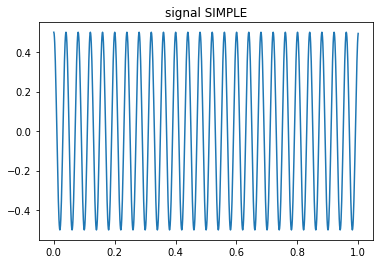

40000


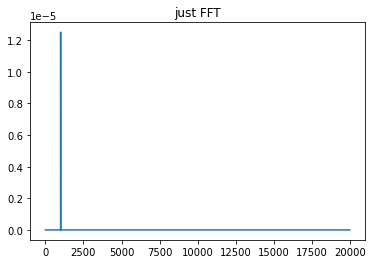

In [5]:
signal = generate_sin(0.5, 1000, 40000, 40000, False)
print("signal samples", len(signal))
plot_signal(signal[0:1000])
draw_fft(signal)


samples modulated =  40000


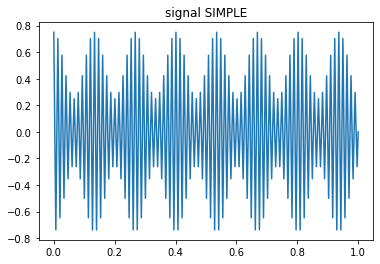

40000


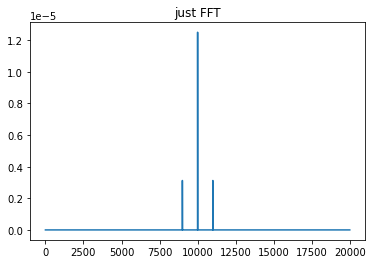

In [6]:
am_mod = mod_am(0.5,signal, 10000, 40000)
print("samples modulated = ",len(am_mod))
plot_signal(am_mod[0:300])
draw_fft(am_mod)

# Demodulate AM

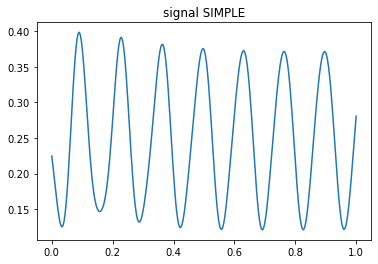

40000


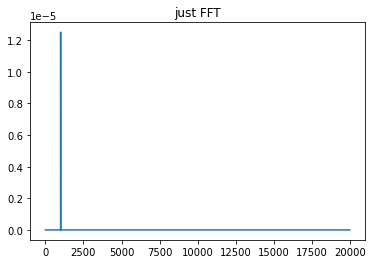

In [7]:
#am_demod = lpf_filter(am_mod,cutoff=1000)
am_demod = mod_am(1.0,am_mod, 10000, 40000)
am_demod = lpf_filter(am_demod,cutoff=2000)
plot_signal(am_demod[300:600])
draw_fft(signal)

# Testing AM generator

In [8]:
SAMPLE_TOTAL=128
FILE_IN_S8="../out/signal_for_am_1000.s8"
FILE_OUT_S8="../out/modulated_am_1000.s8"
signal_s8 = np.fromfile(FILE_IN_S8, np.int8, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)
modulated_s8 = np.fromfile(FILE_OUT_S8, np.int8, count=SAMPLE_TOTAL*2).astype(np.float32).view(np.complex64)

/home/fam/downloads/ML/install/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


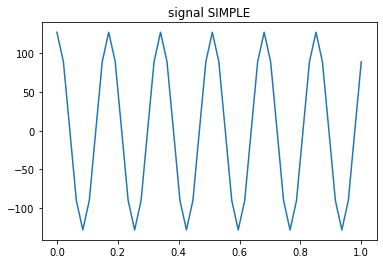

128


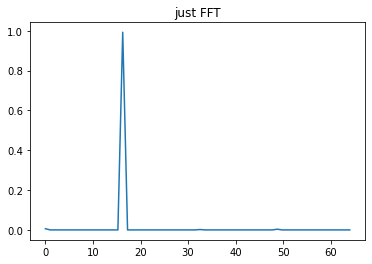

In [9]:
plot_signal(signal_s8[:48])
draw_fft(signal_s8)

## Modulated signal


/home/fam/downloads/ML/install/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


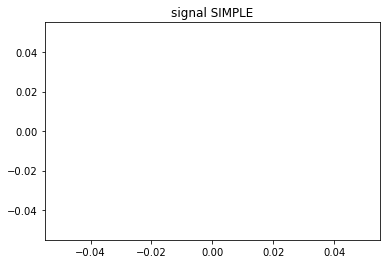

ValueError: invalid number of data points (0) specified

In [10]:
plot_signal(modulated_s8)
draw_fft(modulated_s8)

# Demodulate Radio station

In [15]:
#FILE_AM_STATION = "AM_rec_307000Hz.wav"
FILE_AM_STATION = "08-27-17_7050410Hz_int16.wav"
#32bit float, 768000 sampling rate
am_radio_s16 = np.fromfile(FILE_AM_STATION, np.int16,count=768000*2).astype(np.float32).view(np.complex64)
print("Loaded %d samples"%(len(am_radio_s16)))

Loaded 768000 samples


768000


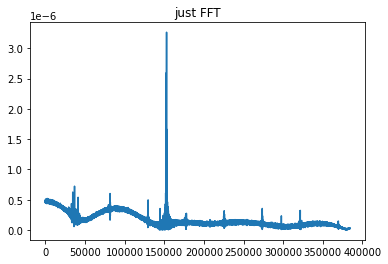

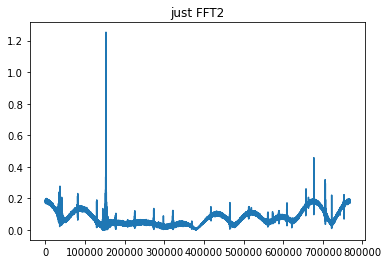

768000


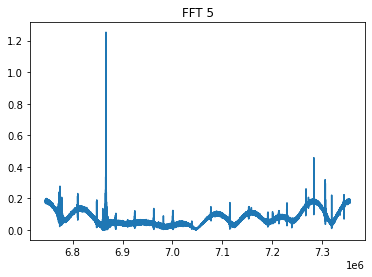

In [20]:
draw_fft(am_radio_s16)
draw_fft2(am_radio_s16)
#draw_fft3(am_radio_s16)
#draw_fft4(am_radio_s16)
draw_fft5(am_radio_s16,fc=7050410,bw=610000,sr=768000)

768000


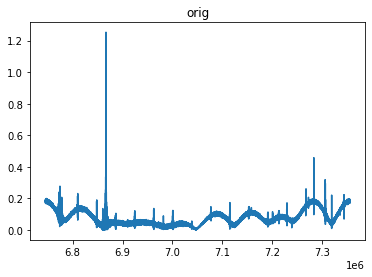

768000


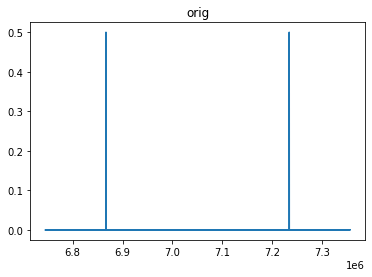

768000


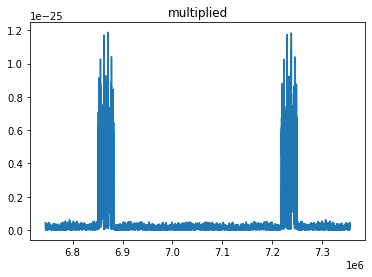

768000


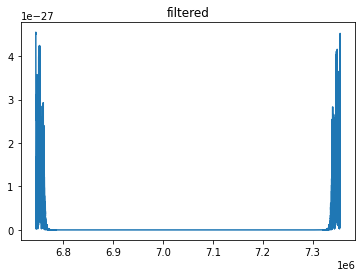

In [78]:
signal_f = 152800
bw=10000
#coef_c = signal_f * (610000.0/768000.0)
scaled = coef_c
fc_sign = generate_sin_c(1.0, signal_f, 768000, len(am_radio_s16))
#print(len(fc_sign))
#am_radio_coef = butter(5,[(scaled-bw),(scaled+bw)],fs=768000,btype="bandpass", output='sos')
#am_radio_filt = sosfilt(am_radio_coef, am_radio_s16)
draw_fft5(am_radio_s16,bw=610000,sr=768000,fc=7050410,title="orig")
draw_fft5(fc_sign,bw=610000,sr=768000,fc=7050410,title="orig")
#draw_fft5(am_radio_filt,bw=610000,sr=768000,fc=7050410,title="filtered")
am_reloc = []
for i in range(0,len(fc_sign)):
    am_reloc.append(fc_sign[i]*am_radio_filt[i])
draw_fft5(am_reloc,bw=610000,sr=768000,fc=7050410,title="multiplied")

# do filtering after relocate the signal
#peaks, _ = scipy.signal.find_peaks(am_radio_s16, height=1.0)
#draw_peaks(am_radio_s16,bw=384000,sr=768000,fc=384000,title="pick")
am_radio_coef = butter(10,[bw*2],fs=768000,btype="lowpass", output='sos')
am_radio_filt = sosfilt(am_radio_coef, am_reloc)
draw_fft5(am_radio_filt,bw=610000,sr=768000,fc=7050410,title="filtered")
